# Bioimage Analysis Project : Code
Submitted By:   

Juslina Pulikkal Jaimathu


Anasua Barman

# Load and Display Image channels in Napari

We have images of 3 samples;Soft,Stiff and Control. The images are multichannel images with three channels , each channel representing adifferent fluorescent stain(Phalloidin, DAPI and YAP).

As an example here we work on the images of sample Stiff.The code loads the multi-channel image and checks its shape. It then splits the image into three channels and visualizes each channel separately using differnet color maps. 

The .lsm file with our images is loaded into a Numpy array. The image shape is printed to understand its dimensions and channels.
Then the loaded image is split into the three separate channels.

In [17]:
import napari
import numpy as np
from matplotlib import pyplot as plt # matplotlib for plotting images
#from skimage.filters import gaussian
#import pyclesperanto_prototype as cle
from skimage import io, color, filters, measure

#from matplotlib_scalebar.scalebar import ScaleBar


In [18]:
import tifffile #A library to read and write TIFF files, including LSM (Zeiss Laser Scanning Microscope) images.

#image= tifffile.imread('C:/Users/pjjus/Downloads/group5_MJ/MJ_20x_1_5kPa_YAPPhallDAPI-1.lsm')
image= tifffile.imread('C:/Users/pjjus/Downloads/group5_MJ/MJ_20x_28kPa_YAPphallDAPI-2.lsm')
#image= tifffile.imread('C:/Users/pjjus/Downloads/group5_MJ/MJ_20x_ctr_phallDAPI-2.lsm')

In [19]:
# Check the shape of the image
print("Image shape:", image.shape)

# Split the image into its respective channels and save each channel separately
channel_1 = image[0, :, :]# Channel 1: Phalloidin staining (actin cytoskeleton)
channel_2 = image[1, :, :]# Channel 2: DAPI staining (nucleus)
channel_3 = image[2, :, :]# Channel 3: YAP staining (YAP localization)

Image shape: (3, 3440, 3440)


We load each image channel into the Napari viewer, applying the 'additive' blending mode for a merged view. Colormaps are assigned to distinguish channels, and scaling ensures accurate spatial representation. Contrast limits are adjusted to enhance visibility, making it easy to explore and analyze the images interactively.mm

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


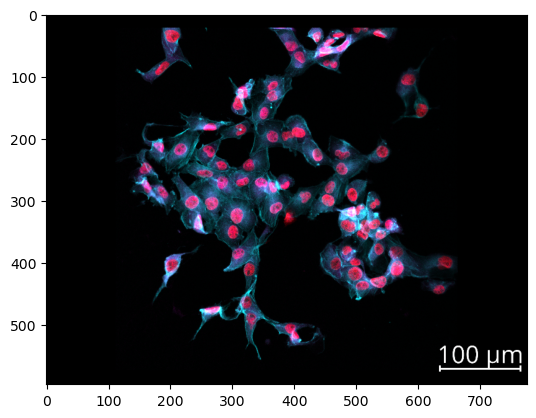

In [34]:

import napari

pixelsize_y = 0.12357444
pixelsize_x = 0.12357444

with napari.gui_qt():# Launches a Qt event loop in which the Napari viewer operates.
    viewer = napari.Viewer()#Creates a new Napari viewer object.
    
    # Add the image to the viewer with the correct scale    
    viewer.add_image(channel_1, scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="cyan")
    viewer.add_image(channel_2, scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="red")
    viewer.add_image(channel_3, scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="magenta")

    # Enable the scale bar
    viewer.scale_bar.visible = True

    # Set the scale bar units and size
    viewer.scale_bar.unit = "µm"  # the unit ("µm" for micrometers)
    viewer.scale_bar.font_size = 20
    viewer.scale_bar.color = 'white'  #Set the color of the scale bar
    viewer.scale_bar.position = 'bottom_right'  # position

    # Take a screenshot of the viewer
    screenshot = viewer.screenshot()
    fig, ax = plt.subplots()
    ax.imshow(screenshot)

# Filtering

Next we apply filtering techniques to enhance our images, preparing them for analysis.

1. Gaussian Filtering
2. Median FIltering
3. TopHat + Gaussian
4. Difference Of Gaussian

## Gaussian Filtering
The code applies Gaussian filtering to three image channels to smooth and reduce noise. Using a Gaussian kernel with sigma=2, the filter blurs the images, enhancing their visual quality by averaging pixel values.


A standard deviation (sigma) of 2,controls the degree of smoothing.

In [20]:
from skimage.filters import gaussian 

#Apply gaussian filtering to each channel
channel_1_filteredG = gaussian(channel_1, sigma=2)
channel_2_filteredG = gaussian(channel_2, sigma=2)
channel_3_filteredG = gaussian(channel_3, sigma=2)

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


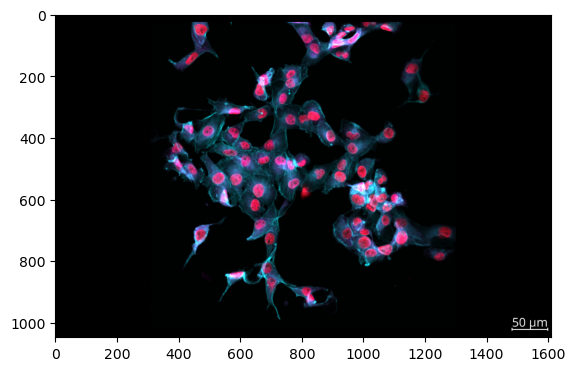

In [36]:
# Display in Napari viewer
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(channel_1_filteredG, name='Channel gaussian 1',scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="cyan",contrast_limits=(0, 1))
    viewer.add_image(channel_2_filteredG, name='Channel gaussian 2',scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="red",contrast_limits=(0, 1))
    viewer.add_image(channel_3_filteredG, name='Channel  gaussian 3', scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="magenta",contrast_limits=(0, 1))
   
    # Enable scale bar in Napari
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.font_size = 20
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white"
     # Take a screenshot of the viewer
    screenshot = viewer.screenshot()
    fig, ax = plt.subplots()
    ax.imshow(screenshot)

## Median Filtering
We apply a median filter with a filter size of 5 to each image channel to reduce noise and then display the filtered channels in grayscale to visualize the  effect.

In [37]:
from scipy.ndimage import median_filter  # Median filter function
import numpy as np  
from matplotlib import pyplot as plt  
# Define the filter size
filter_size = 5

# Apply median filtering to each channel
channel_1_filteredM = median_filter(channel_1, size=filter_size)
channel_2_filteredM = median_filter(channel_2, size=filter_size)
channel_3_filteredM = median_filter(channel_3, size=filter_size)

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


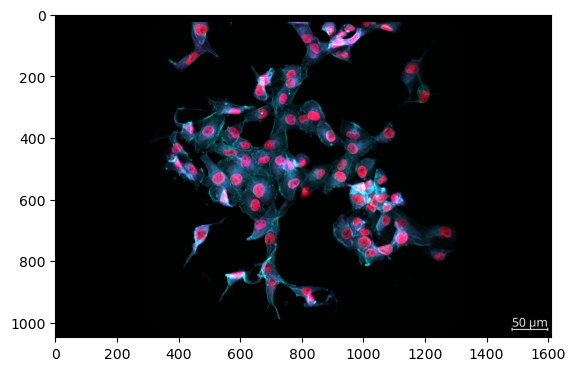

In [38]:
# Display in Napari viewer
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(channel_1_filteredM, name='Channel Median 1',scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="cyan")
    viewer.add_image(channel_2_filteredM, name='Channel Median 2',scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="red")
    viewer.add_image(channel_3_filteredM, name='Channel  Median 3', scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="magenta")
   
    # Enable scale bar in Napari
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.font_size = 20
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white" 
    screenshot = viewer.screenshot()
    fig, ax = plt.subplots()
    ax.imshow(screenshot)

## Tophat Filtering


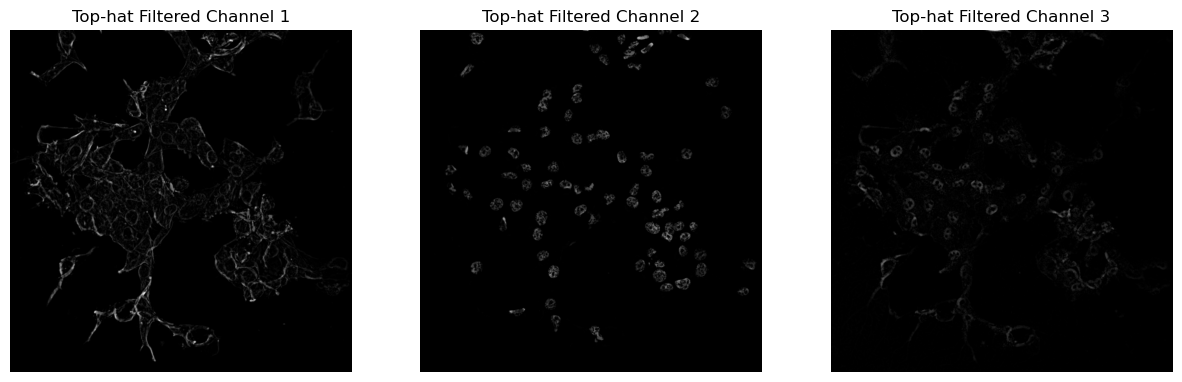

In [39]:
from scipy import ndimage
from skimage import morphology, util
from matplotlib import pyplot as plt

# Define the structuring element (kernel)
kernel_size = 20 # we used kernal size 100 for the project
selem = morphology.disk(kernel_size)

# Apply the top-hat filter to each channel
# First, perform the morphological opening
opened1 = morphology.opening(channel_1_filteredG, selem)
opened2 = morphology.opening(channel_2_filteredG, selem)
opened3 = morphology.opening(channel_3_filteredG, selem)

# Then, subtract the opened image from the original image
tophat1G = channel_1_filteredG - opened1
tophat2G = channel_2_filteredG - opened2
tophat3G = channel_3_filteredG - opened3

# Normalize the result to fit in the range [0, 1]
tophat1G_norm = util.img_as_float(tophat1G)
tophat2G_norm = util.img_as_float(tophat2G)
tophat3G_norm = util.img_as_float(tophat3G)

# Display each top-hat filtered channel with a suitable color map
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color_maps = ['gray', 'gray', 'gray']

filtered_channels = [tophat1G_norm, tophat2G_norm, tophat3G_norm]
for i in range(3):
    axs[i].imshow(filtered_channels[i], cmap=color_maps[i])
    axs[i].set_title(f'Top-hat Filtered Channel {i+1}')
    axs[i].axis('off')

# Show the figure
plt.show()

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


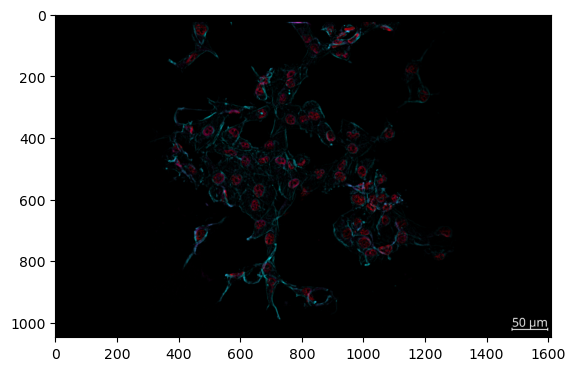

In [40]:
# Display in Napari viewer
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(tophat1G, name=' tophat Channel 1', scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="cyan",contrast_limits=(0, 1))
    viewer.add_image(tophat2G, name='tophat Channel 2', scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="red",contrast_limits=(0, 1))
    viewer.add_image(tophat3G, name='tophat Channel 3', scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="magenta",contrast_limits=(0, 1))
   
    # Enable scale bar in Napari
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.font_size = 20
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white" 
    screenshot = viewer.screenshot()
    fig, ax = plt.subplots()
    ax.imshow(screenshot)

## Difference of Gaussain

### Gaussian filtering: Larger sigma

we're applying a Gaussian filter with a larger sigma (sigma=5) to each of the three image channels (channel_1, channel_2, and channel_3). 

In [21]:
###Larger Sigma
# Apply Gaussian filtering to each channel
channel_1_filteredGL = gaussian(channel_1, sigma=5)
channel_2_filteredGL= gaussian(channel_2, sigma=5)
channel_3_filteredGL = gaussian(channel_3, sigma=5)



C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


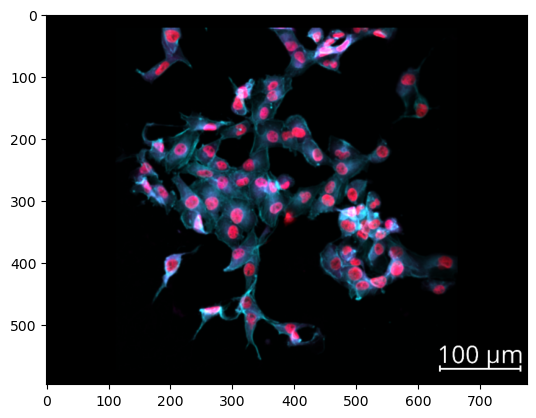

In [42]:
# Display in Napari viewer
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(channel_1_filteredGL, name='Channel gaussian 1',scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="cyan",contrast_limits=(0, 1))
    viewer.add_image(channel_2_filteredGL, name='Channel gaussian 2',scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="red",contrast_limits=(0, 1))
    viewer.add_image(channel_3_filteredGL, name='Channel  gaussian 3', scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="magenta",contrast_limits=(0, 1))
   
    # Enable scale bar in Napari
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.font_size = 20
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white" 
     # Take a screenshot of the viewer
    screenshot = viewer.screenshot()
    fig, ax = plt.subplots()
    ax.imshow(screenshot)

### Difference of Gaussians (DoG) and Image Enhancement
The DoG is computed by subtracting a larger sigma Gaussian-filtered image from a smaller sigma Gaussian-filtered image. This difference highlights edges and other fine details in the image. The resulting DoG is then added back to the smaller sigma Gaussian-filtered image to enhance it. 

In [23]:
import numpy as np
from skimage import util

# Function to compute Difference of Gaussians (DoG) and enhance the image
def enhance_image_with_dog(small_sigma_image, large_sigma_image):
    """
    Compute the Difference of Gaussians (DoG) and enhance the image.
    
    Parameters:
    - small_sigma_image: The Gaussian-filtered image with the smaller sigma (2D array).
    - large_sigma_image: The Gaussian-filtered image with the larger sigma (2D array).
    
    Returns:
    - enhanced_image: Resulting image after adding DoG to the Gaussian image.
    """
    # Calculate the Difference of Gaussians (DoG)
    dog_image = small_sigma_image - large_sigma_image
    
    # Enhance the image by adding DoG to the Gaussian-filtered image
    enhanced_image = small_sigma_image + dog_image
    
    # Normalize the result to fit in the range [0, 1]
    enhanced_image_norm = util.img_as_float(enhanced_image)
    
    return enhanced_image_norm

# Apply the enhancement for each channel
enhanced1 = enhance_image_with_dog(channel_1_filteredG, channel_1_filteredGL)
enhanced2 = enhance_image_with_dog(channel_2_filteredG, channel_2_filteredGL)
enhanced3 = enhance_image_with_dog(channel_3_filteredG, channel_3_filteredGL)


C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


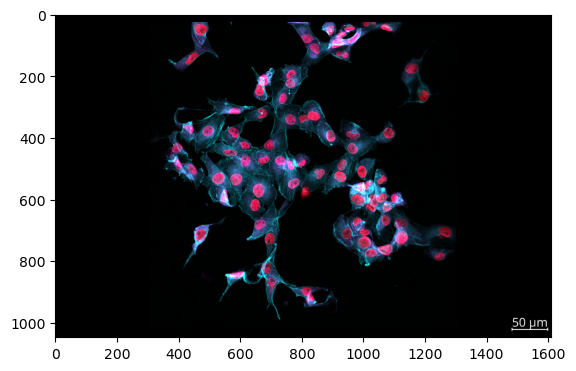

In [44]:
# Display in Napari viewer
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(enhanced1, name='Channel enhdog 1',scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="cyan",contrast_limits=(0, 1))
    viewer.add_image(enhanced2, name='Channel enhdog 2',scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="red",contrast_limits=(0, 1))
    viewer.add_image(enhanced3, name='Channel  enhdog 3', scale=(pixelsize_y, pixelsize_x),blending='additive',colormap="magenta",contrast_limits=(0, 1))
   
    # Enable scale bar in Napari
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.font_size = 20
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white"  
     # Take a screenshot of the viewer
    screenshot = viewer.screenshot()
    fig, ax = plt.subplots()
    ax.imshow(screenshot)

We select the DoG-enhanced image for further processing in our analysis.

# Segmentation of Images

We apply two different segmentation techniques to identify and label objects within the images. 

1. **Voronoi Otsu Threshold Labelling**
 
2. **APOC Object Segmentation**


## 1. Voroni Otsu Threshold Labelling
We use the `pyclesperanto_prototype` library to perform Voronoi Otsu labeling on the filtered channel image.
We'll use `enhanced2` for segmentation. 

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
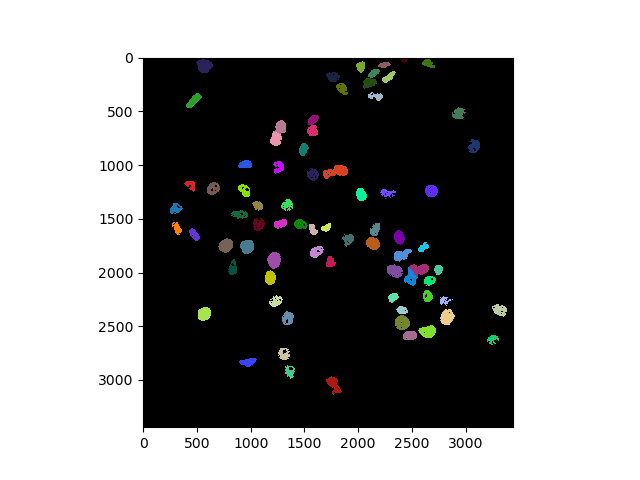

In [24]:
import pyclesperanto_prototype as cle  # Provides the Voronoi Otsu labeling function

# Perform Voronoi Otsu labeling on the filtered channelimage(DoG enhanced) image
label_image = cle.voronoi_otsu_labeling(enhanced2, 
                                        spot_sigma=25,  
                                        outline_sigma=1)  
channel_2_filteredGV = np.random.random((3440, 3440))  # Placeholder for actual image data
# Display the labeled image
label_image

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


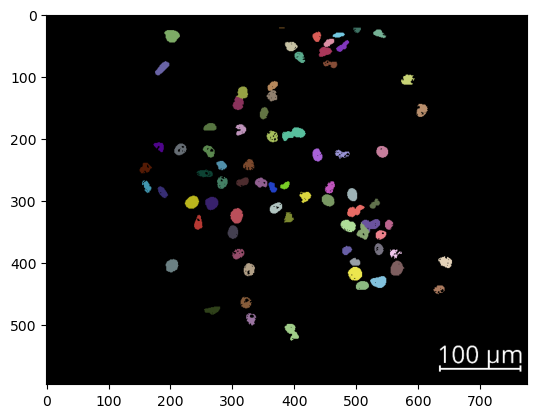

In [46]:
with napari.gui_qt():
    viewer = napari.Viewer()

    viewer.add_image(label_image, name='Voronoi Otsu Segmented',scale=(pixelsize_y, pixelsize_x))  # Add the segmented image
    viewer.add_labels(label_image, name='Segmentation Otsu Labels',scale=(pixelsize_y, pixelsize_x))  # Add the label layer

    # Enable scale bar in Napari
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.font_size = 20
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white" 
    screenshot = viewer.screenshot()
    fig, ax = plt.subplots()
    ax.imshow(screenshot)

## 2.Apply APOC Object Segmentation
We utilize a pre-trained APOC object segmenter to segment the filtered image. The APOC segmenter was previously trained using the image data and the model was saved for later use.
The following code demonstrates loading the trained APOC segmenter, applying it to the filtered image, and visualizing the segmentation results.

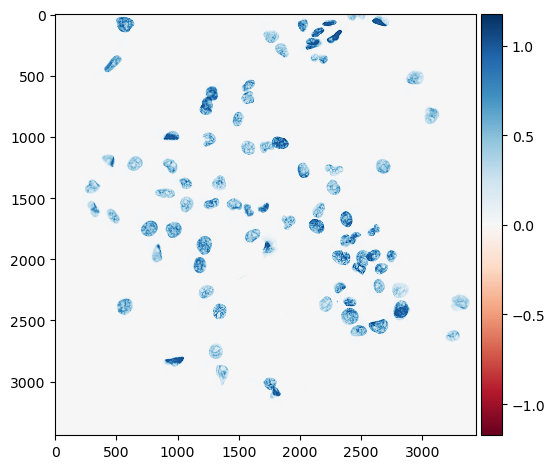

In [47]:
from skimage.io import imread, imshow  # Import functions for image handling
import pyclesperanto_prototype as cle  # Import Pyclesperanto for image processing
import numpy as np  # Import NumPy for array manipulation
from apoc import ObjectSegmenter  # Import the APOC object segmenter

# Load and display the input image
imageA= enhanced2
imshow(imageA)  # Display the image using skimage's imshow
# Initialize the segmenter with the path to the pre-trained model
segmenter =ObjectSegmenter(opencl_filename='C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/APOC FIxes/APOC trainning n Gaussian filter.cl')

# Apply the segmenter to the filtered image
segmentation_result =  segmenter.predict(image=imageA)

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


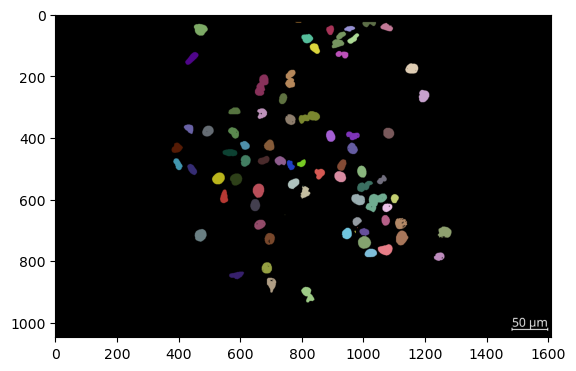

In [48]:
channel_2_filteredGS = np.random.random((3440, 3440))  
with napari.gui_qt():
    viewer = napari.Viewer()

    viewer.add_image(segmentation_result, name='APOC Segmented',scale=(pixelsize_y, pixelsize_x))  # Add the segmented image
    viewer.add_labels(segmentation_result, name='Segmentation Result',scale=(pixelsize_y, pixelsize_x))  # Add the label layer
    
    
    viewer.scale_bar.visible = True
    viewer.scale_bar.unit = "um"
    viewer.scale_bar.font_size = 20
    viewer.scale_bar.position = "bottom_right"  
    viewer.scale_bar.color = "white" 
    screenshot = viewer.screenshot()
    fig, ax = plt.subplots()
    ax.imshow(screenshot)

# Bland-Altman Analysis of Nuclei Counting

In this section, we perform Bland-Altman analysis to compare the nuclei counts obtained from the Voroni Otsu segmentation and APOC segmentation against manually counted nuclei (gold standard). The analysis is divided into several steps:

1. **Divide the image into regions** for nuclei counting.
2. **Manually count the nuclei** in each region to establish the gold standard.
3. **Count the nuclei** in each region from the Voroni Otsu and APOC segmented images.
4. **Create a Bland-Altman plot** to visualize the agreement between methods.


In [49]:
#image = enhanced2 # channel 2 DoG enhanced image
image=segmentation_result # APOC segmented 
#image=label_image # Voroni Otsu segmented

# Display the shape of the image
print("Image shape:", image.shape)

Image shape: (3440, 3440)


### Divide the image into 5 equal regions
Crop the image into specific regions to analyze different parts separately.

In [50]:
# Crop the image into different regions height-wise
cropped_image1 = image[20:700, 20:3420]           # Region 1: (20, 20) to (700, 3420)
cropped_image2 = image[700:1380, 20:3420]         # Region 2: (700, 20) to (1380, 3420)
cropped_image3 = image[1380:2060, 20:3420]        # Region 3: (1380, 20) to (2060, 3420)
cropped_image4 = image[2060:2740, 20:3420]        # Region 4: (2060, 20) to (2740, 3420)
cropped_image5 = image[2740:3420, 20:3420]        #Region  5: (2740,20)  to  (3420,3420)

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


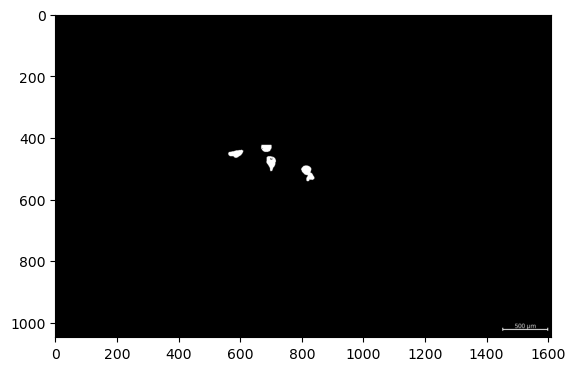

In [56]:


# Display in Napari viewer
with napari.gui_qt():
    viewer = napari.Viewer()


#add cropped roi
viewer.add_image(cropped_image1, name='cropped ROI1', colormap='gray', contrast_limits=(0, 1))
viewer.add_image(cropped_image2, name='croppedROI2', colormap='gray', contrast_limits=(0, 1))
viewer.add_image(cropped_image3, name='cropped ROI3', colormap='gray', contrast_limits=(0, 1))
viewer.add_image(cropped_image4, name='cropped ROI4', colormap='gray', contrast_limits=(0, 1))
viewer.add_image(cropped_image5, name='cropped ROI5', colormap='gray', contrast_limits=(0, 1))


# Enable scale bar in Napari
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"
viewer.scale_bar.position = "bottom_right"
viewer.scale_bar.color = "white"

screenshot = viewer.screenshot()
fig, ax = plt.subplots()
ax.imshow(screenshot)
    
# Start the Napari event loop
napari.run()

### Count the nuclei from the current layer in the viewer

In [57]:
import napari
import numpy as np

# have the viewer open and the segmented image as a label layer
viewer = napari.current_viewer()

# Get the label layer (adjust index as needed)
label_layer = viewer.layers[2].data

# Get the unique labels
unique_labels = np.unique(label_layer)

# Count the number of unique labels excluding the background (assumed to be 0)
num_labels = len(unique_labels) - 1 if 0 in unique_labels else len(unique_labels)

print(f"Number of labels: {num_labels}")


Number of labels: 30


Crop out the regions for both the sgmentations and use the above code to count the nucleii.

# Bland-Altmann Analysis
Compare the nuclei counts obtained from the Voronoi Otsu segmentation method and the APOC object segmentation method against the manually counted gold standard. The Bland-Altman plot helps to visualize the agreement between different methods by plotting the mean of the counts against the difference between methods.

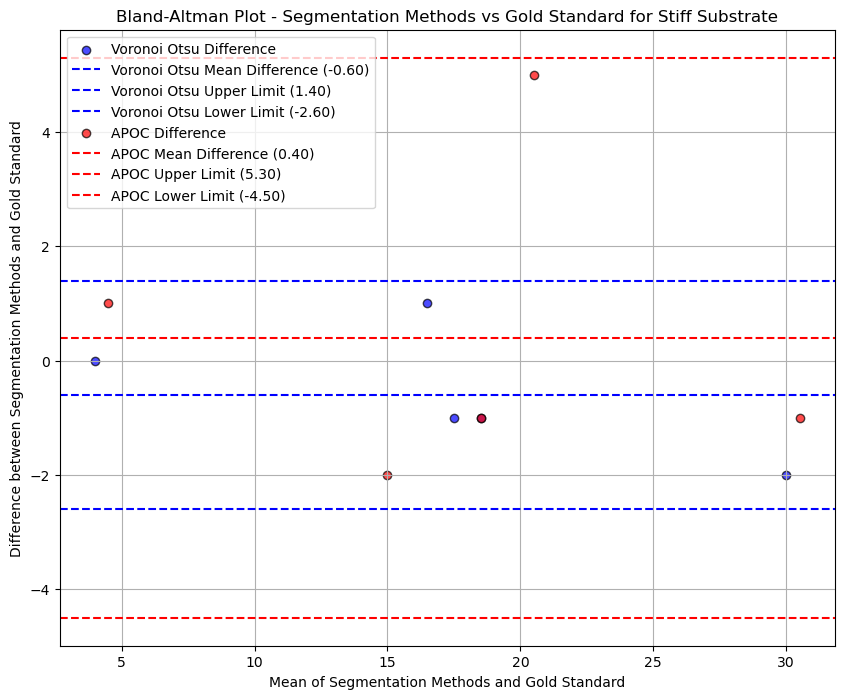

In [58]:
voronoi_segmented = np.array([17,18,29,17,4])  # Nuclei counts from Voronoi Otsu segmentation
gold_standard = np.array([16,19,31,18,4])       # Manually counted nuclei (gold standard)
apoc_segmented = np.array([14,18,30,23,5])       # Nuclei counts from APOC segmentation

# Function to create Bland-Altman plot
def bland_altman_plot(method1, method2, method1_name, method2_name, color, label_prefix):
    means = (method1 + method2) / 2
    differences = method1 - method2
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)
    
    plt.scatter(means, differences, color=color, edgecolor='k', alpha=0.7, label=f'{label_prefix} Difference')
    plt.axhline(mean_diff, color=color, linestyle='--', label=f'{label_prefix} Mean Difference ({mean_diff:.2f})')
    plt.axhline(mean_diff + 1.96 * std_diff, color=color, linestyle='--', label=f'{label_prefix} Upper Limit ({mean_diff + 1.96 * std_diff:.2f})')
    plt.axhline(mean_diff - 1.96 * std_diff, color=color, linestyle='--', label=f'{label_prefix} Lower Limit ({mean_diff - 1.96 * std_diff:.2f})')


plt.figure(figsize=(10, 8))

# Plot for Voronoi Otsu segmentation vs Gold Standard
bland_altman_plot(voronoi_segmented, gold_standard, 'Voronoi Otsu Segmentation', 'Gold Standard', 'blue', 'Voronoi Otsu')

# Plot for APOC segmentation vs Gold Standard
bland_altman_plot(apoc_segmented, gold_standard, 'APOC Segmentation', 'Gold Standard', 'red', 'APOC')

plt.xlabel('Mean of Segmentation Methods and Gold Standard')
plt.ylabel('Difference between Segmentation Methods and Gold Standard')
plt.title('Bland-Altman Plot - Segmentation Methods vs Gold Standard for Stiff Substrate')
plt.legend()
plt.grid(True)
plt.show()

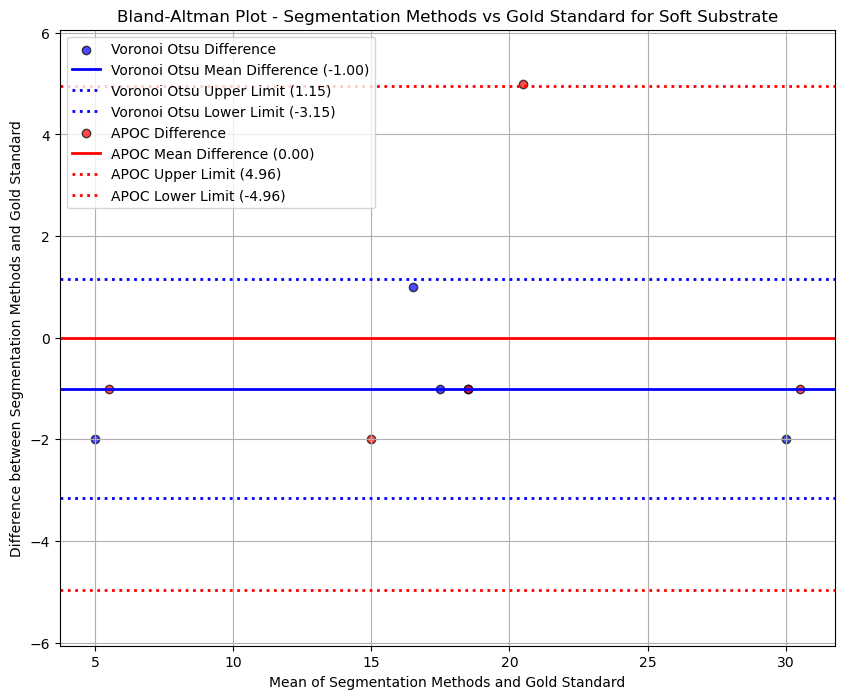

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Data
voronoi_segmented = np.array([17,18,29,17,4])  # Nuclei counts from Voronoi Otsu segmentation
gold_standard = np.array([16,19,31,18,6])       # Manually counted nuclei (gold standard)
apoc_segmented = np.array([14,18,30,23,5])       # Nuclei counts from APOC segmentation


# Function to create Bland-Altman plot
def bland_altman_plot(method1, method2, method1_name, method2_name, color, label_prefix):
    means = (method1 + method2) / 2
    differences = method1 - method2
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)
    
    plt.scatter(means, differences, color=color, edgecolor='k', alpha=0.7, label=f'{label_prefix} Difference')
    plt.axhline(mean_diff, color=color, linestyle='-', linewidth=2, label=f'{label_prefix} Mean Difference ({mean_diff:.2f})')
    plt.axhline(mean_diff + 1.96 * std_diff, color=color, linestyle=':', linewidth=2, label=f'{label_prefix} Upper Limit ({mean_diff + 1.96 * std_diff:.2f})')
    plt.axhline(mean_diff - 1.96 * std_diff, color=color, linestyle=':', linewidth=2, label=f'{label_prefix} Lower Limit ({mean_diff - 1.96 * std_diff:.2f})')
    return mean_diff, std_diff

plt.figure(figsize=(10, 8))

# Plot for Voronoi Otsu segmentation vs Gold Standard
mean_diff_voronoi, std_diff_voronoi = bland_altman_plot(voronoi_segmented, gold_standard, 'Voronoi Otsu Segmentation', 'Gold Standard', 'blue', 'Voronoi Otsu')

# Plot for APOC segmentation vs Gold Standard
mean_diff_apoc, std_diff_apoc = bland_altman_plot(apoc_segmented, gold_standard, 'APOC Segmentation', 'Gold Standard', 'red', 'APOC')

# Set y-limit to ensure the plot is centered around the mean difference
y_limit = max(abs(mean_diff_voronoi) + 2*std_diff_voronoi, abs(mean_diff_apoc) + 2*std_diff_apoc) + 1
plt.ylim(-y_limit, y_limit)

plt.xlabel('Mean of Segmentation Methods and Gold Standard')
plt.ylabel('Difference between Segmentation Methods and Gold Standard')
plt.title('Bland-Altman Plot - Segmentation Methods vs Gold Standard for Soft Substrate')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Saving the images

In [25]:
import imageio
# output paths
filtered_image_path = "C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_filtered_ch-2.tiff"
segmented_image_path = "C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/segmentedVORONI_stiff_ch-2.tiff"
YAP_path="C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_filtered_channel 3.tiff"

# Save the images
imageio.imwrite(filtered_image_path, enhanced2)
imageio.imwrite(segmented_image_path, label_image)
imageio.imwrite(YAP_path, enhanced3)


print(f"Filtered image saved to: {filtered_image_path}")
print(f"VoroniSegmented image saved to: {segmented_image_path}")
print(f"channel 3 filtreed image:{YAP_path}")

Filtered image saved to: C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_filtered_ch-2.tiff
VoroniSegmented image saved to: C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/segmentedVORONI_stiff_ch-2.tiff
channel 3 filtreed image:C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_filtered_channel 3.tiff


In [26]:
input_image = enhanced2
input21=enhanced3
voronoi_otsu_segmentation = label_image

#apoc=imread(apocSEgmented)

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


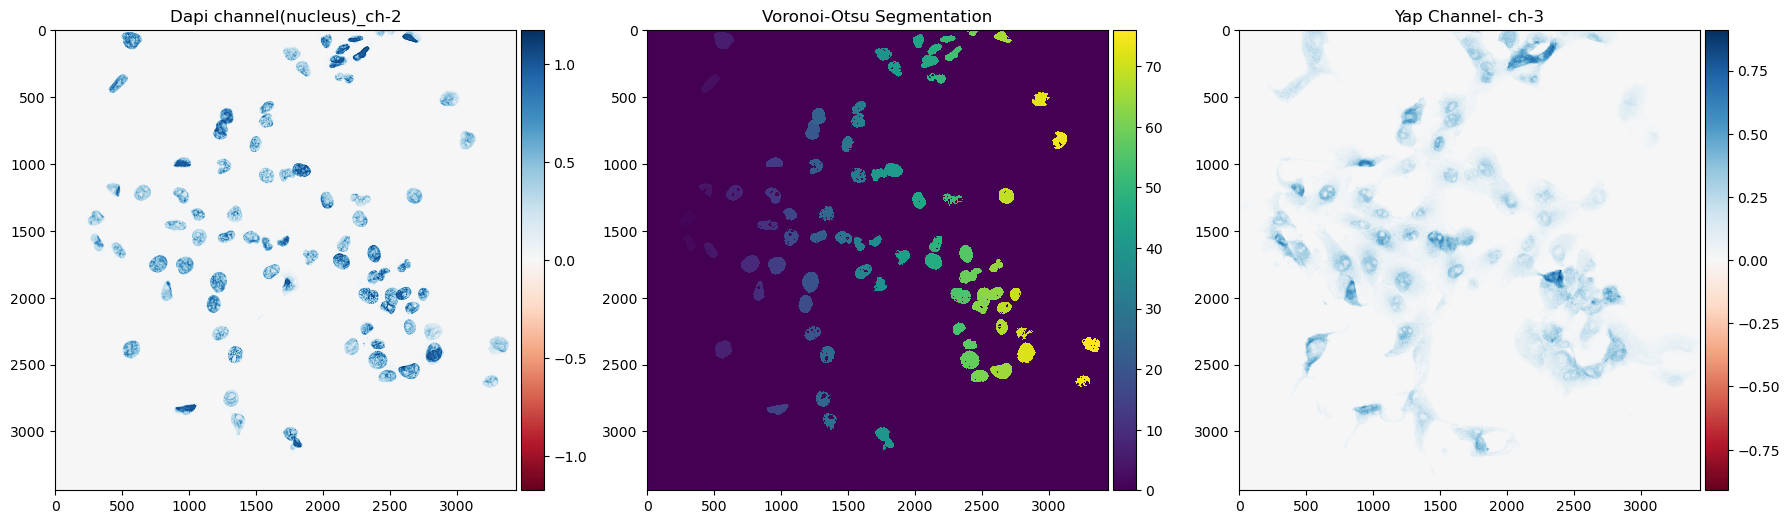

In [27]:
import matplotlib.pyplot as plt
from skimage.io import imshow

plt.figure(figsize=(18, 12))

# First subplot: Input Image
plt.subplot(1, 3, 1)  # Adjusted to 1 row, 3 columns
plt.title('Dapi channel(nucleus)_ch-2')
imshow(input_image)

# Second subplot: Voronoi-Otsu Segmentation
plt.subplot(1, 3, 2)  # Adjusted to 1 row, 3 columns
plt.title('Voronoi-Otsu Segmentation')
imshow(voronoi_otsu_segmentation)

# Third subplot: APOC Segmentation
#plt.subplot(1, 3, 3)  
#plt.title('APOC Segmentation')
#imshow(apocSEgmented)  

plt.subplot(1, 3, 3)  
plt.title('Yap Channel- ch-3')
imshow(input21)  
plt.show()


# Feature Extraction
we will extract features from the segmented images.We extract shape properties (area, perimeter) and intensity properties (mean intensity) using `regionprops_tabl`  from the `skimage` library. Circularity is calculated for the segmented regions and added to the shape properties DataFrame. The resulting DataFrames are saved as CSV files.

To compute the intensity for each segmented region, we use the Voroni-Otsu Segmentation mask to extract corresponding pixel values from the filtered image. We use the channel 2 segmentation mask for extrcacting the mean inttensity from channel 2 and channel 3.

For each labeled region, the following features are calculated:

Label: Unique identifier for the region.

Area: Number of pixels in the region.

Perimeter: Length of the boundary of the region.

Mean Intensity: Average pixel intensity within the region.

Circularity: A measure of how circular the region is, calculated asThe formula for circularity is given by $\left(\frac{4\pi \times \text{Area}}{\text{Perimeter}^2}\right)$.


In [9]:
# SOFT
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.measure import regionprops_table

# Load the segmented and original images
input_image = imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/soft_filtered_ch-2.tiff')#ch-2 filtered
voronoi_otsu_segmentation = imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/segmentedVORONI_soft_ch-2.tiff')#voroni otsu segmented
input2=imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/soft_filtered_channel 3.tiff')#ch-3 filtered


#Shape properties
shape_properties = ['label', 'area', 'perimeter']

#Intensity properties
intensity_properties=['label','mean_intensity']


# Extract properties using regionprops_table
props1 = regionprops_table(voronoi_otsu_segmentation, properties=shape_properties)
props2 = regionprops_table(voronoi_otsu_segmentation, intensity_image=input_image, properties=intensity_properties)#channel 2 intensities
props3 = regionprops_table(voronoi_otsu_segmentation, intensity_image=input2, properties=intensity_properties)#channel 3 intensities---- input2 is DoG  filtered ch-3, segmentation is voron segemented ch-2

# Convert the results into a DataFrame
df_shape= pd.DataFrame(props1)
df_intensity_DAPI= pd.DataFrame(props2)
df_intensity_YAP= pd.DataFrame(props3)

# Calculate circularity and add it to the shape properties DataFrame
df_shape['circularity'] = (4 * np.pi * df_shape['area']) / (df_shape['perimeter'] ** 2)
df_shape['circularity'].replace([np.inf, np.nan], 0, inplace=True)

# Save the DataFrame to a CSV file
df_shape.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/soft_Ch-2 SHAPE.csv', index=False)
df_intensity_DAPI.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/soft_Ch-2 INTENSITY.csv', index=False)
df_intensity_YAP.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/soft_Ch-3 INTENSITY.csv', index=False)

# Display the first few rows of the DataFrame
print(df_shape.head())
print(df_intensity_DAPI.head())
print(df_intensity_YAP.head())


   label     area   perimeter  circularity
0      1   1658.0  189.396970     0.580829
1      2   6761.0  497.546248     0.343205
2      3  10679.0  392.333044     0.871828
3      4   7890.0  463.102597     0.462309
4      5  10614.0  397.889394     0.842489
   label  mean_intensity
0      1        0.426442
1      2        0.335720
2      3        0.466144
3      4        0.322111
4      5        0.567769
   label  mean_intensity
0      1        0.371749
1      2        0.279062
2      3        0.345700
3      4        0.313758
4      5        0.279775


C:\Users\pjjus\AppData\Local\Temp\ipykernel_23680\617002166.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shape['circularity'].replace([np.inf, np.nan], 0, inplace=True)


In [10]:
#STIFF
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.measure import regionprops_table

# Load the segmented and original images
input_image2 = imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_filtered_ch-2.tiff')# dapi channel 2 filtered
voronoi_otsu_segmentation2 = imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/segmentedVORONI_stiff_ch-2.tiff')
input2stif=imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_filtered_channel 3.tiff')

#Shape properties
shape_properties = ['label', 'area', 'perimeter']

#Intensity properties
intensity_properties=['label','mean_intensity']


# Extract properties using regionprops_table
props1stif = regionprops_table(voronoi_otsu_segmentation2, properties=shape_properties)
props2stif = regionprops_table(voronoi_otsu_segmentation2, intensity_image=input_image2, properties=intensity_properties)
props3stif = regionprops_table(voronoi_otsu_segmentation2, intensity_image=input2stif, properties=intensity_properties)

# Convert the results into a DataFrame
df_shape2= pd.DataFrame(props1stif)
df_intensity_DAPI2= pd.DataFrame(props2stif)
df_intensity_YAP2= pd.DataFrame(props3stif)

# Calculate circularity and add it to the shape properties DataFrame
df_shape2['circularity'] = (4 * np.pi * df_shape2['area']) / (df_shape2['perimeter'] ** 2)
df_shape2['circularity'].replace([np.inf, np.nan], 0, inplace=True)

# Save the DataFrame to a CSV file
df_shape2.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_Ch-2 SHAPE.csv', index=False)
df_intensity_DAPI2.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_Ch-2 INTENSITY.csv', index=False)
df_intensity_YAP2.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_Ch-3 INTENSITY.csv', index=False)

# Display the first few rows of the DataFrame
print(df_shape2.head())
print(df_intensity_DAPI2.head())
print(df_intensity_YAP2.head())


   label     area   perimeter  circularity
0      1   8052.0  572.783838     0.308413
1      2   6681.0  595.233585     0.236961
2      3  10496.0  442.399062     0.673915
3      4   6302.0  396.676190     0.503287
4      5   7418.0  418.073160     0.533325
   label  mean_intensity
0      1        0.427174
1      2        0.469866
2      3        0.591028
3      4        0.511617
4      5        0.443464
   label  mean_intensity
0      1        0.237751
1      2        0.394570
2      3        0.144941
3      4        0.406225
4      5        0.276868


C:\Users\pjjus\AppData\Local\Temp\ipykernel_23680\1296973224.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shape2['circularity'].replace([np.inf, np.nan], 0, inplace=True)


In [11]:
# control
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.measure import regionprops_table

# Load the segmented and original images
input_image3= imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/control filtered ch-2.tiff')
voronoi_otsu_segmentation3 = imread('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/segmentedVORONI control ch-2.tiff')


#Shape properties
shape_properties = ['label', 'area', 'perimeter']

#Intensity properties
intensity_properties=['label','mean_intensity']


# Extract properties using regionprops_table
props1control = regionprops_table(voronoi_otsu_segmentation3, properties=shape_properties)
props2control = regionprops_table(voronoi_otsu_segmentation3, intensity_image=input_image3, properties=intensity_properties)


# Convert the results into a DataFrame
df_shape3= pd.DataFrame(props1control)
df_intensity_DAPI3= pd.DataFrame(props2control)


# Calculate circularity and add it to the shape properties DataFrame
df_shape3['circularity'] = (4 * np.pi * df_shape3['area']) / (df_shape3['perimeter'] ** 2)
df_shape3['circularity'].replace([np.inf, np.nan], 0, inplace=True)

# Save the DataFrame to a CSV file
df_shape3.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/Control_Ch-2 SHAPE.csv', index=False)
df_intensity_DAPI3.to_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/Control_Ch-2 INTENSITY.csv', index=False)

# Display the first few rows of the DataFrame
print(df_shape3.head())
print(df_intensity_DAPI3.head())


   label    area   perimeter  circularity
0      1  6391.0  336.350288     0.709897
1      2   484.0   90.077164     0.749594
2      3  8286.0  366.977705     0.773171
3      4  5748.0  323.220346     0.691400
4      5  5518.0  330.267027     0.635713
   label  mean_intensity
0      1        0.618797
1      2        0.447819
2      3        0.463382
3      4        0.651895
4      5        0.583021


C:\Users\pjjus\AppData\Local\Temp\ipykernel_23680\222041956.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shape3['circularity'].replace([np.inf, np.nan], 0, inplace=True)


Next we combine the extracted shape properties (area, perimeter, circularity) for soft and stiff samples into single DataFrames for each parameter. These combined DataFrames are used for comparative analysis between the two conditions. We will not be using the Control sample for analysis as that sampele was made to test if the yap staining was successsful.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap

# Load the shape and intensity data for stiff and soft samples
df_shape_stiff = pd.read_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_Ch-2 SHAPE.csv')
df_intensity_DAPI_stiff = pd.read_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/stiff_Ch-2 INTENSITY.csv')

df_shape_soft = pd.read_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/soft_Ch-2 SHAPE.csv')
df_intensity_DAPI_soft = pd.read_csv('C:/Users/pjjus/OneDrive/Desktop/Bioimage analysis/Final Fixes/soft_Ch-2 INTENSITY.csv')

# Add a 'Sample' column to differentiate soft and stiff samples
df_shape_stiff['Sample'] = 'Stiff'
df_intensity_DAPI_stiff['Sample'] = 'Stiff'
df_shape_soft['Sample'] = 'Soft'
df_intensity_DAPI_soft['Sample'] = 'Soft'

# Combine shape and intensity data for stiff and soft samples
df_stiff_combined = pd.concat([df_shape_stiff, df_intensity_DAPI_stiff.drop(columns='label')], axis=1)
df_soft_combined = pd.concat([df_shape_soft, df_intensity_DAPI_soft.drop(columns='label')], axis=1)

# Combine both soft and stiff data into a single DataFrame
df_combined = pd.concat([df_stiff_combined, df_soft_combined], ignore_index=True)

# Drop duplicate columns if necessary
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

# Extract area, perimeter, circularity, and mean intensity data into separate DataFrames
df_area_combined = df_combined[['label', 'area', 'Sample']].copy()
df_perimeter_combined = df_combined[['label', 'perimeter', 'Sample']].copy()
df_circularity_combined = df_combined[['label', 'circularity', 'Sample']].copy()
df_intensity_combined = df_combined[['label', 'mean_intensity', 'Sample']].copy()

# Display the combined DataFrames
print("Area Combined DataFrame:")
print(df_area_combined.head())
print("\nPerimeter Combined DataFrame:")
print(df_perimeter_combined.head())
print("\nCircularity Combined DataFrame:")
print(df_circularity_combined.head())
print("\nIntensity Combined DataFrame:")
print(df_intensity_combined.head())

Area Combined DataFrame:
   label     area Sample
0      1   8052.0  Stiff
1      2   6681.0  Stiff
2      3  10496.0  Stiff
3      4   6302.0  Stiff
4      5   7418.0  Stiff

Perimeter Combined DataFrame:
   label   perimeter Sample
0      1  572.783838  Stiff
1      2  595.233585  Stiff
2      3  442.399062  Stiff
3      4  396.676190  Stiff
4      5  418.073160  Stiff

Circularity Combined DataFrame:
   label  circularity Sample
0      1     0.308413  Stiff
1      2     0.236961  Stiff
2      3     0.673915  Stiff
3      4     0.503287  Stiff
4      5     0.533325  Stiff

Intensity Combined DataFrame:
   label  mean_intensity Sample
0      1        0.427174  Stiff
1      2        0.469866  Stiff
2      3        0.591028  Stiff
3      4        0.511617  Stiff
4      5        0.443464  Stiff


# Violin Plot and T-Test for Shape and Intensity Properties

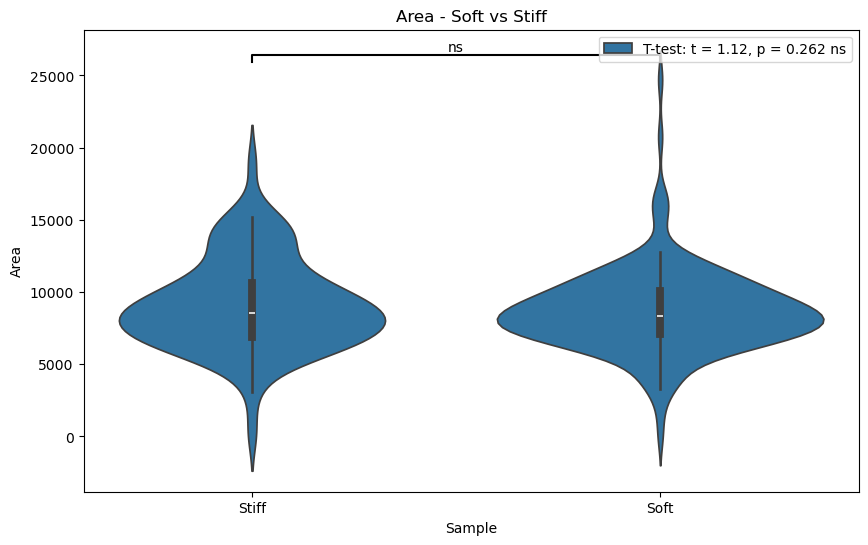

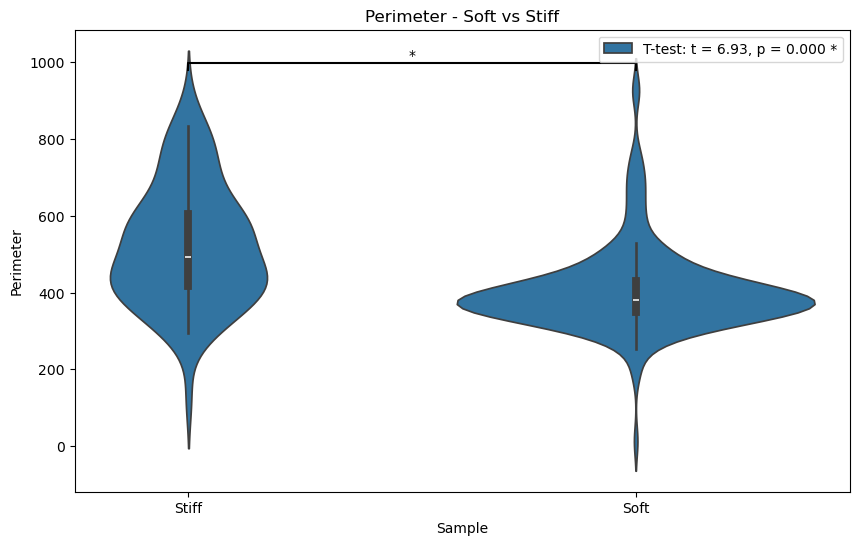

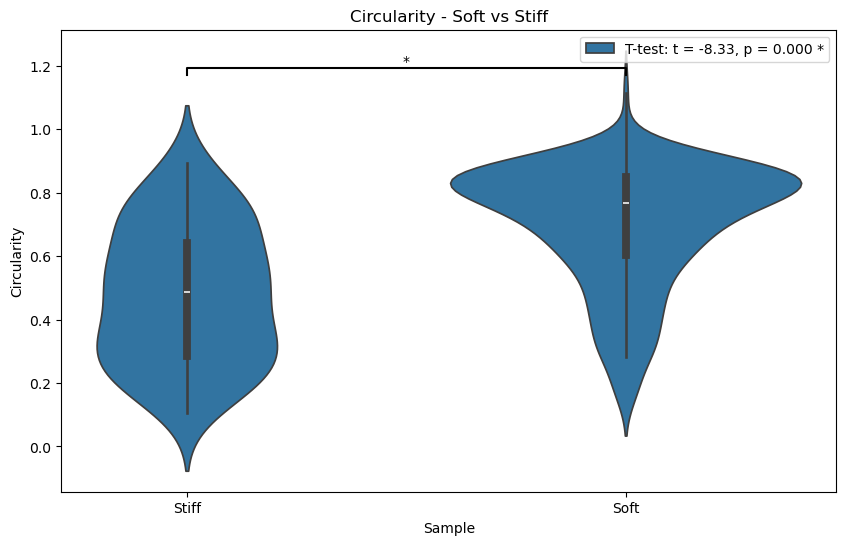

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Function to perform T-test and plot violin plot
def plot_violin_and_ttest(df, parameter):
    # Separate data for Soft and Stiff samples
    soft_values = df[df['Sample'] == 'Soft'][parameter]
    stiff_values = df[df['Sample'] == 'Stiff'][parameter]
    
    # Perform T-test
    t_stat, p_value = ttest_ind(stiff_values, soft_values)
    
    # Determine significance level and add asterisk if significant
    significance_level = 0.05
    if p_value < significance_level:
        significance = '*'
    else:
        significance = 'ns'  # not significant

    # Create the legend text
    legend_text = f'T-test: t = {t_stat:.2f}, p = {p_value:.3f} {significance}'

    # Violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Sample', y=parameter, data=df)
    plt.title(f'{parameter.capitalize()} - Soft vs Stiff')
    plt.ylabel(parameter.capitalize())
    plt.xlabel('Sample')

    # Add the significance bar
    x1, x2 = 0, 1   # indices of the groups to compare
    y, h, col = df[parameter].max() + 0.05 * df[parameter].max(), 0.02 * df[parameter].max(), 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=col)

    # Add the legend with the t-test result
    plt.legend([legend_text], loc='upper right')

    # Show the plot
    plt.show()

# Plot and perform T-test for each parameter
plot_violin_and_ttest(df_area_combined, 'area')
plot_violin_and_ttest(df_perimeter_combined, 'perimeter')
plot_violin_and_ttest(df_circularity_combined, 'circularity')


### Intensity for channel 2 and channel 3

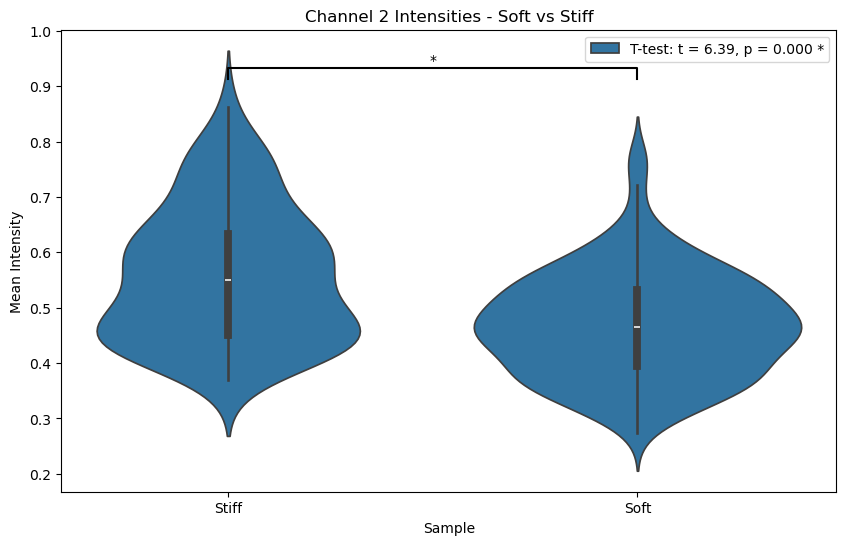

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Combine the intensity data for Channel 2 from the merged DataFrame
df_channel2 = df_combined[['mean_intensity', 'Sample']].copy()

# T-test between soft and stiff samples for Channel 2
soft_intensity = df_channel2[df_channel2['Sample'] == 'Soft']['mean_intensity']
stiff_intensity = df_channel2[df_channel2['Sample'] == 'Stiff']['mean_intensity']
t_stat, p_value = ttest_ind(stiff_intensity, soft_intensity)

# Determine significance level and add an asterisk if significant
significance_level = 0.05
significance = '*' if p_value < significance_level else 'ns'  # not significant

# Create the legend text
legend_text = f'T-test: t = {t_stat:.2f}, p = {p_value:.3f} {significance}'

# Violin plot for Channel 2 intensities
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sample', y='mean_intensity', data=df_channel2)
plt.title('Channel 2 Intensities - Soft vs Stiff')
plt.ylabel('Mean Intensity')
plt.xlabel('Sample')

# Add the significance bar
x1, x2 = 0, 1   # indices of the groups to compare
y, h, col = df_channel2['mean_intensity'].max() + 0.05, 0.02, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=col)

# Add the legend with the t-test result
plt.legend([legend_text], loc='upper right')

plt.show()


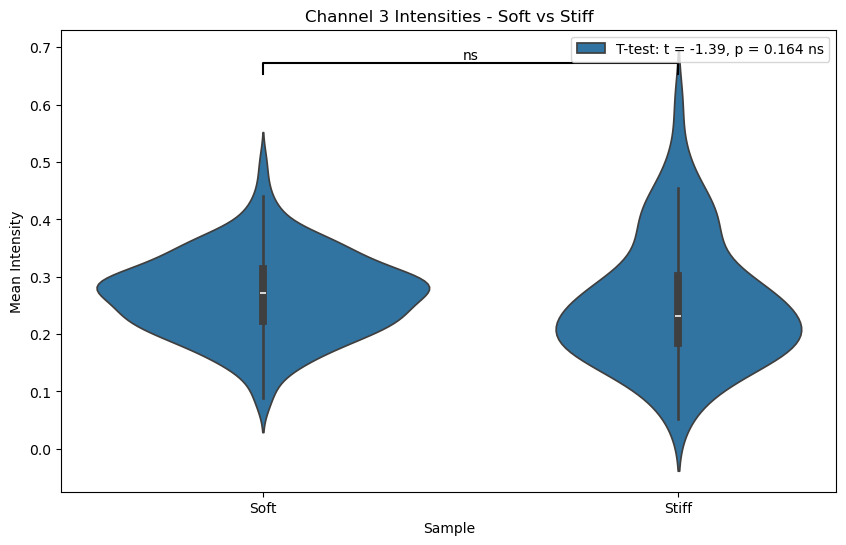

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Combine the data into one DataFrame
df_channel3 = pd.concat([
    df_intensity_YAP.assign(Sample='Soft'),
    df_intensity_YAP2.assign(Sample='Stiff')
])

# T-test between soft and stiff samples for Channel 3
soft_intensity = df_intensity_YAP['mean_intensity']
stiff_intensity = df_intensity_YAP2['mean_intensity']
t_stat, p_value = ttest_ind(stiff_intensity, soft_intensity)

# Determine significance level and add asterisk if significant
significance_level = 0.05
if p_value < significance_level:
    significance = '*'
else:
    significance = 'ns'  # not significant

# Create the legend text
legend_text = f'T-test: t = {t_stat:.2f}, p = {p_value:.3f} {significance}'

# Violin plot for Channel 3 intensities
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sample', y='mean_intensity', data=df_channel3)
plt.title('Channel 3 Intensities - Soft vs Stiff')
plt.ylabel('Mean Intensity')
plt.xlabel('Sample')

# Add the significance bar
x1, x2 = 0, 1   # indices of the groups to compare
y, h, col = df_channel3['mean_intensity'].max() + 0.05, 0.02, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, significance, ha='center', va='bottom', color=col)

# Add the legend with the t-test result
plt.legend([legend_text], loc='upper right')

plt.show()


# Dimensionality Reduction - UMAP

We perform dimensionality reduction on the combined dataset of shape and intensity features using Uniform Manifold Approximation and Projection (UMAP). 

 We select the features area, mean_intensity, perimeter, and circularity. A scatter plot is generated to visualize the UMAP results, where each point represents a sample (either soft or stiff). The plot is colored based on the sample type (soft or stiff).

C:\Users\pjjus\miniforge3\envs\my_first_env\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


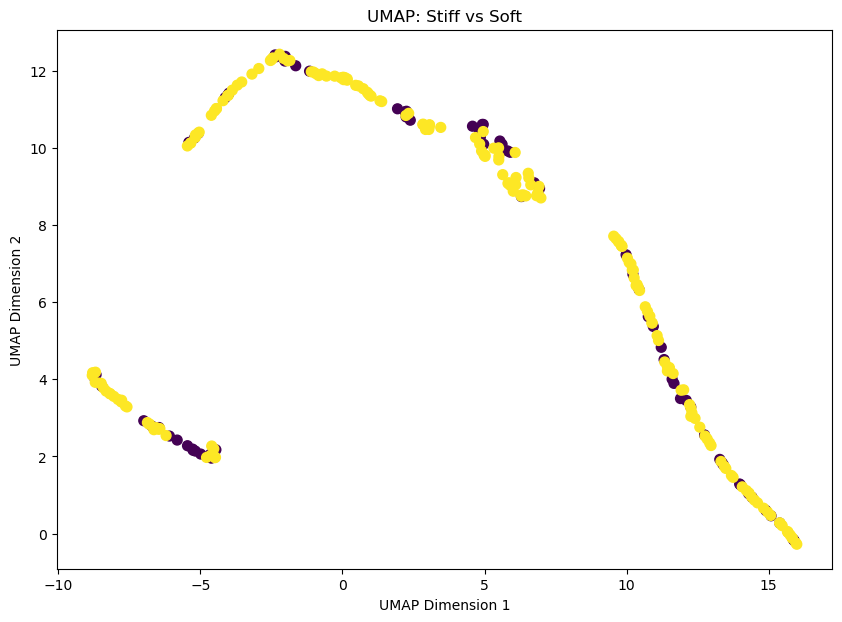

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import umap

# Select the features for UMAP
features = ['area', 'mean_intensity', 'perimeter', 'circularity']

# Extract the relevant data from the DataFrame
data = df_combined[features].values

# Perform UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(data)

# Plot the UMAP results with color, but without the color bar
plt.figure(figsize=(10, 7))
plt.scatter(
    umap_result[:, 0], 
    umap_result[:, 1], 
    c=df_combined['Sample'].map({'Stiff': 0, 'Soft': 1}), 
    cmap='viridis', 
    s=50
)
plt.title('UMAP: Stiff vs Soft')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Remove the color bar
plt.show()


For more details on the methods and results, please check the detailed project report.